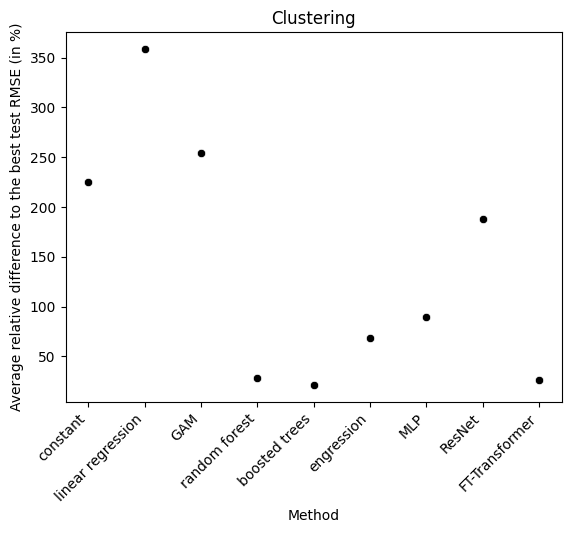

In [45]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox

directory = r'RESULTS/CLUSTERING'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_clustering_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        lowest_rmse = table['RMSE'].min()
        df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Clustering')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/clustering_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

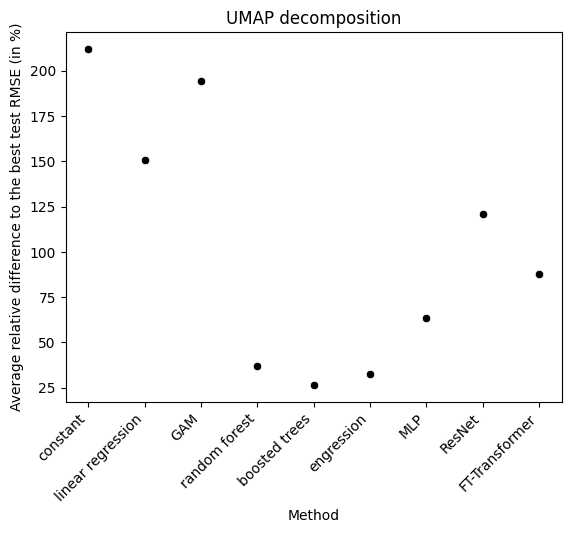

In [46]:
import os
import pandas as pd

directory = r'RESULTS/UMAP_DECOMPOSITION'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_umap_decomposition_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        lowest_rmse = table['RMSE'].min()
        df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('UMAP decomposition')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/umap_decomposition_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

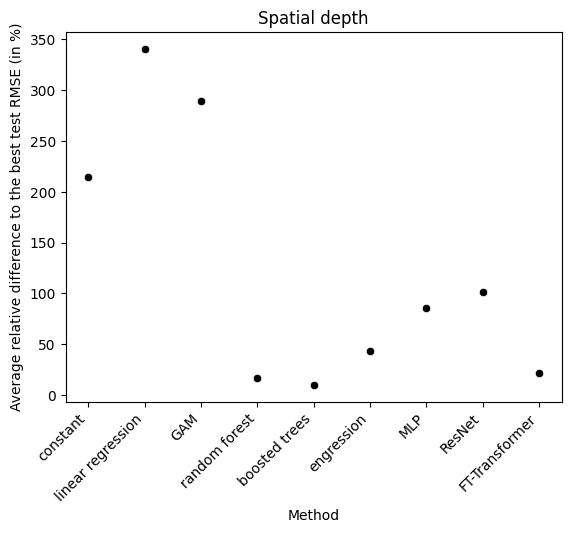

In [47]:
import os
import pandas as pd

directory = r'RESULTS/SPATIAL_DEPTH'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_spatial_depth_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        lowest_rmse = table['RMSE'].min()
        df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Spatial depth')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/spatial_depth_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

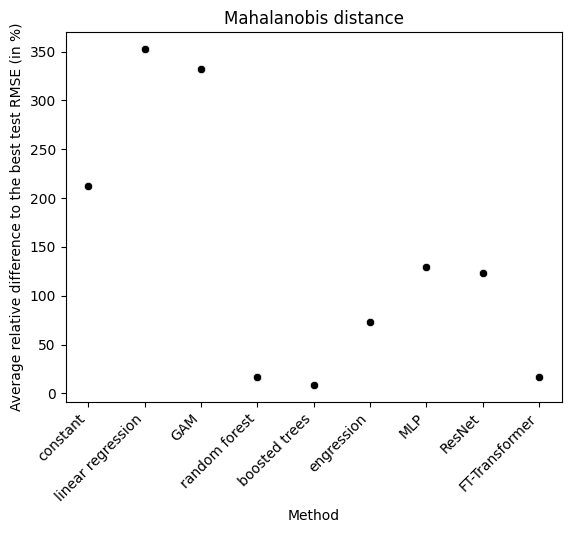

In [48]:
import os
import pandas as pd

directory = r'RESULTS/MAHALANOBIS'
df = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        task_name = filename.split('_mahalanobis_RMSE')[0]
        filepath = os.path.join(directory, filename)
        table = pd.read_csv(filepath)
        rmse = table['RMSE']
        lowest_rmse = rmse.min()
        df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Mahalanobis distance')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/mahalanobis_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

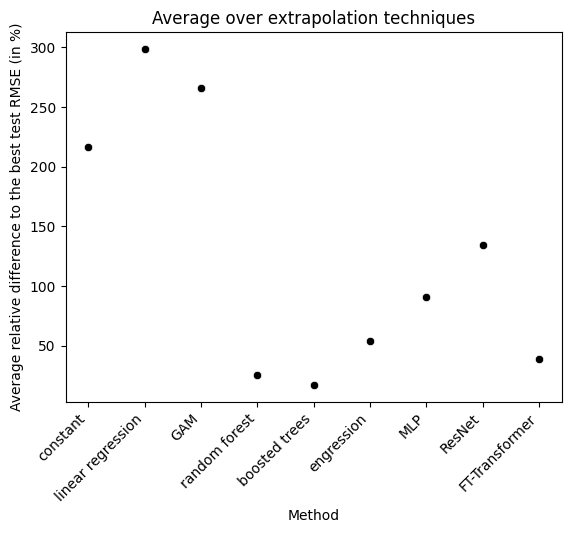

In [49]:
# Plotting the average test accuracy for all extrapolation methods
import os
import pandas as pd
import seaborn as sns

list_directories = [r'RESULTS/CLUSTERING', r'RESULTS/UMAP_DECOMPOSITION', r'RESULTS/SPATIAL_DEPTH', r'RESULTS/MAHALANOBIS']
df = pd.DataFrame()

for directory in list_directories:
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            task_name = filename
            filepath = os.path.join(directory, filename)
            table = pd.read_csv(filepath) 
            rmse = table['RMSE']
            lowest_rmse = rmse.min()
            df[task_name] = (rmse - lowest_rmse) / lowest_rmse

df.index=table['Method']
df.index.name = 'Method'
mean = df.mean(axis=1)
median = df.median(axis=1)
std = df.std(axis=1)
result_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Standard Deviation': std})
result_df.index.name = 'Method'
result_df.reset_index(inplace=True)

# Reorder the methods
method_order = ['constant', 'linear_regression', 'GAM', 'rf', 'boosted_trees', 'engression', 'MLP', 'ResNet', 'FTTrans']
result_df['Method'] = pd.Categorical(result_df['Method'], categories=method_order, ordered=True)

# Sort the dataframe by the reordered method column
result_df.sort_values('Method', inplace=True)

result_df['Method'] = result_df['Method'].replace({'rf': 'random forest', 'boosted_trees': 'boosted trees', 'linear_regression': 'linear regression', 'FTTrans': 'FT-Transformer'})
result_df['Mean'] = 100*result_df['Mean']

# Plot the scatterplot
sns.scatterplot(data=result_df, x='Method', y='Mean', color='black')

# Removing the ylabel
plt.ylabel('Average relative difference to the best test RMSE (in %)')

# Adding labels and title
plt.xlabel('Method')
plt.title('Average over extrapolation techniques')

# Rotating x-axis labels vertically
plt.xticks(rotation=45, ha='right')

# Set the figure size
fig = plt.gcf()  # Get the current figure
fig_size = fig.get_size_inches()  # Get the size of the figure


# Save the plot
os.makedirs('PICTURES', exist_ok=True)
plt.savefig('PICTURES/average_over_extrapolation_techniques_RMSE_only_num_features_relative_differences.png', bbox_inches=Bbox([[0,-1], [fig_size[0], fig_size[1]]]))

plt.show()

In [34]:
df

,361072_clustering_RMSE_results.csv,361073_clustering_RMSE_results.csv,361074_clustering_RMSE_results.csv,361076_clustering_RMSE_results.csv,361077_clustering_RMSE_results.csv,361078_clustering_RMSE_results.csv,361079_clustering_RMSE_results.csv,361080_clustering_RMSE_results.csv,361081_clustering_RMSE_results.csv,361082_clustering_RMSE_results.csv,...,361076_mahalanobis_RMSE_results.csv,361078_mahalanobis_RMSE_results.csv,361079_mahalanobis_RMSE_results.csv,361080_mahalanobis_RMSE_results.csv,361081_mahalanobis_RMSE_results.csv,361082_mahalanobis_RMSE_results.csv,361083_mahalanobis_RMSE_results.csv,361085_mahalanobis_RMSE_results.csv,361086_mahalanobis_RMSE_results.csv,361087_mahalanobis_RMSE_results.csv
Method,,,,,,,,,,,,,,,,,,,,,
constant,4.869878,2.478117,2.069471,0.230901,2.132007,1.159426,0.220058,4.003738,14.113042,0.539036,...,0.269660,1.031794,0.170873,3.536961,3.929889,0.982189,0.493064,0.726119,3.541248,2.475855
MLP,0.227927,0.286279,0.038157,0.070028,3.253413,0.149792,0.113908,0.330645,11.492685,0.018083,...,0.188042,0.156417,0.115645,0.489872,11.674630,0.034683,0.841720,0.000000,1.087036,0.555393
ResNet,3.227186,1.258413,0.728184,0.128325,7.599370,0.609895,0.097931,1.500955,11.304930,1.033007,...,0.066377,0.379683,0.167416,1.865730,4.813573,0.565289,0.357593,0.340591,2.340309,1.689909
FTTrans,0.375015,0.024076,0.193495,0.094698,2.616148,0.001220,0.920868,0.040518,0.000000,0.075941,...,0.000000,0.229055,0.056378,0.120075,0.179560,0.030421,0.040937,0.081986,0.282098,0.186737
boosted_trees,0.000000,0.285504,0.349882,0.056962,0.285339,0.000000,0.000000,0.000000,1.995872,0.000000,...,0.003073,0.006101,0.000000,0.000000,0.000000,0.000000,0.002147,0.088529,0.485044,0.000000
rf,0.207757,0.313940,0.551966,0.093283,0.487739,0.025378,0.045628,0.126074,2.483302,0.042665,...,0.020572,0.000000,0.041477,0.034784,0.133879,0.042695,0.000000,0.120253,0.476214,0.502819
linear_regression,17.105856,1.923916,0.370763,0.000000,0.164377,0.527749,0.558984,2.200387,38.879020,0.704784,...,0.051034,0.630859,0.436694,1.861319,26.856837,0.686299,0.449640,0.462568,3.658357,0.997598
engression,0.957472,0.000000,0.000000,0.295097,0.000000,0.076424,0.165877,0.098804,10.017173,0.058049,...,0.052440,0.346842,0.034786,0.256418,5.487666,0.016833,0.087657,0.038049,0.000000,0.264713
GAM,4.696218,2.070281,2.058518,0.306073,2.145655,0.357092,0.200674,0.076900,8.146568,0.452775,...,0.259337,0.483039,0.532840,1.303630,26.680722,0.709821,0.413368,0.738378,4.305515,2.381660
